data source: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import numpy as np
import pandas as pd
import datetime

In [25]:
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
byDate = df.groupby([df['date_added'].dt.date, "type"])["show_id"].count().reset_index()
byDate

,date_added,type,show_id
0,2008-01-01,Movie,1
1,2008-02-04,TV Show,1
2,2009-05-05,Movie,1
3,2009-11-18,Movie,1
4,2010-11-01,Movie,1
...,...,...,...
2540,2021-09-23,Movie,1
2541,2021-09-23,TV Show,1
2542,2021-09-24,Movie,3
2543,2021-09-24,TV Show,7


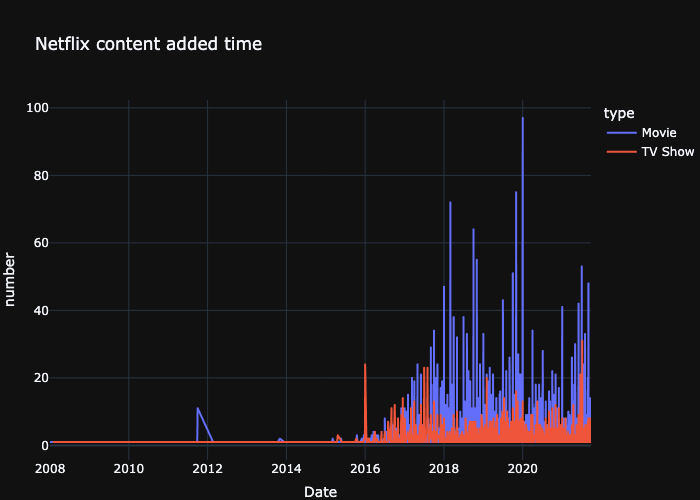

In [38]:
fig = px.line(byDate, x='date_added', y='show_id', color = "type",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix content added time')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [17]:
byMonth = df.groupby([df['date_added'].dt.to_period('M'), "type"])["show_id"].count().reset_index()
byMonth["date_added"] = byMonth["date_added"].astype("string")
byMonth

,date_added,type,show_id
0,2008-01,Movie,1
1,2008-02,TV Show,1
2,2009-05,Movie,1
3,2009-11,Movie,1
4,2010-11,Movie,1
...,...,...,...
188,2021-07,TV Show,88
189,2021-08,Movie,117
190,2021-08,TV Show,61
191,2021-09,Movie,118


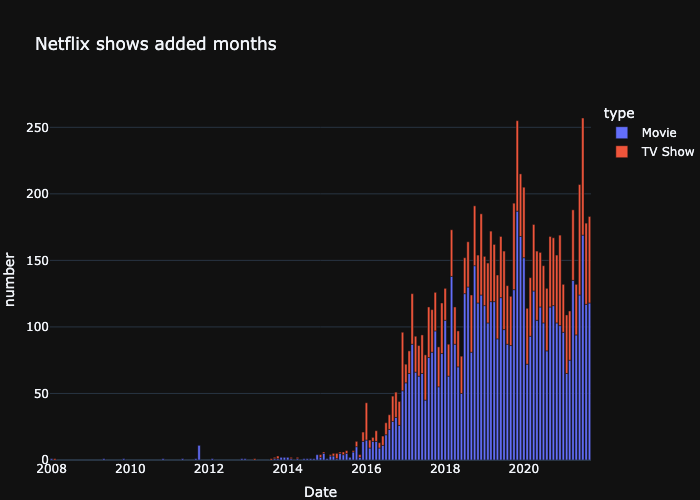

In [37]:
fig = px.bar(byMonth, x='date_added', y='show_id', color = "type",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix shows added months')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

In [22]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
byYear = df.groupby([df['date_added'].dt.year, "rating"])["show_id"].count().reset_index()
byYear

,date_added,rating,show_id
0,2008.0,TV-MA,2
1,2009.0,TV-MA,2
2,2010.0,NR,1
3,2011.0,TV-14,5
4,2011.0,TV-MA,3
...,...,...,...
104,2021.0,TV-G,44
105,2021.0,TV-MA,489
106,2021.0,TV-PG,97
107,2021.0,TV-Y,57


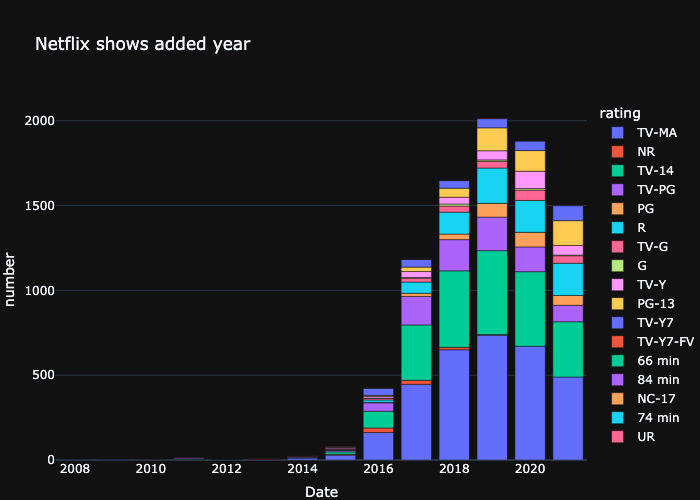

In [36]:
fig = px.bar(byYear, x='date_added', y='show_id', color = "rating",
             labels={'date_added':'Date', 'show_id':'number'}, 
             title='Netflix shows added year')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
#fig.write_html("visuals/byDate-bar.html")

- TV-MA: content for mature audiences, equivalent to the MPAA film ratings R and NC-17.
- TV-14: content with parents strongly cautioned, equivalent to the MPAA film rating PG-13. 